In [1]:
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# 지표 데이터 가져오기
stock_data = pd.read_excel('../../index_Infomation_v0.1.xlsx')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3833 entries, 0 to 3832
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3833 non-null   datetime64[ns]
 1   nasdaq_Close               3833 non-null   float64       
 2   snp500_Close               3833 non-null   float64       
 3   DJI_Close                  3833 non-null   float64       
 4   KOSPI_Close                3833 non-null   float64       
 5   samsung_PER                3833 non-null   float64       
 6   samsung_PBR                3833 non-null   float64       
 7   samsung_ROE                3833 non-null   float64       
 8   apple_PER                  3833 non-null   float64       
 9   apple_PBR                  3833 non-null   float64       
 10  gold_Close                 3833 non-null   float64       
 11  oil_Close                  3833 non-null   float64       
 12  samsun

In [3]:
compare1 = "samsung"  # samsung, apple
compare2 = "Consumer price month index"
compare2data = "미국 소비자물가지수(CPI) 전월대비"

In [4]:
# 필요한 데이터만 가져오기
df = stock_data[['Date', f'{compare1}_Close', f'{compare2data}', 'dollar_to_won_Close']]
df['US_GDP_KRW'] = round(df[f'{compare2data}'] * df['dollar_to_won_Close'])
df

C:\Users\4호실-8\AppData\Local\Temp\ipykernel_7384\1357975989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['US_GDP_KRW'] = round(df[f'{compare2data}'] * df['dollar_to_won_Close'])


,Date,samsung_Close,미국 소비자물가지수(CPI) 전월대비,dollar_to_won_Close,US_GDP_KRW
0,2014-01-02,26180,233.916,1050.750000,245787.0
1,2014-01-03,25920,233.916,1049.599976,245518.0
2,2014-01-04,25920,233.916,1049.599976,245518.0
3,2014-01-05,25920,233.916,1049.599976,245518.0
4,2014-01-06,26140,233.916,1053.800049,246501.0
...,...,...,...,...,...
3828,2024-06-26,81300,314.175,1390.890015,436983.0
3829,2024-06-27,81600,314.175,1393.380005,437765.0
3830,2024-06-28,81500,314.175,1386.949951,435745.0
3831,2024-06-29,81500,314.175,1386.949951,435745.0


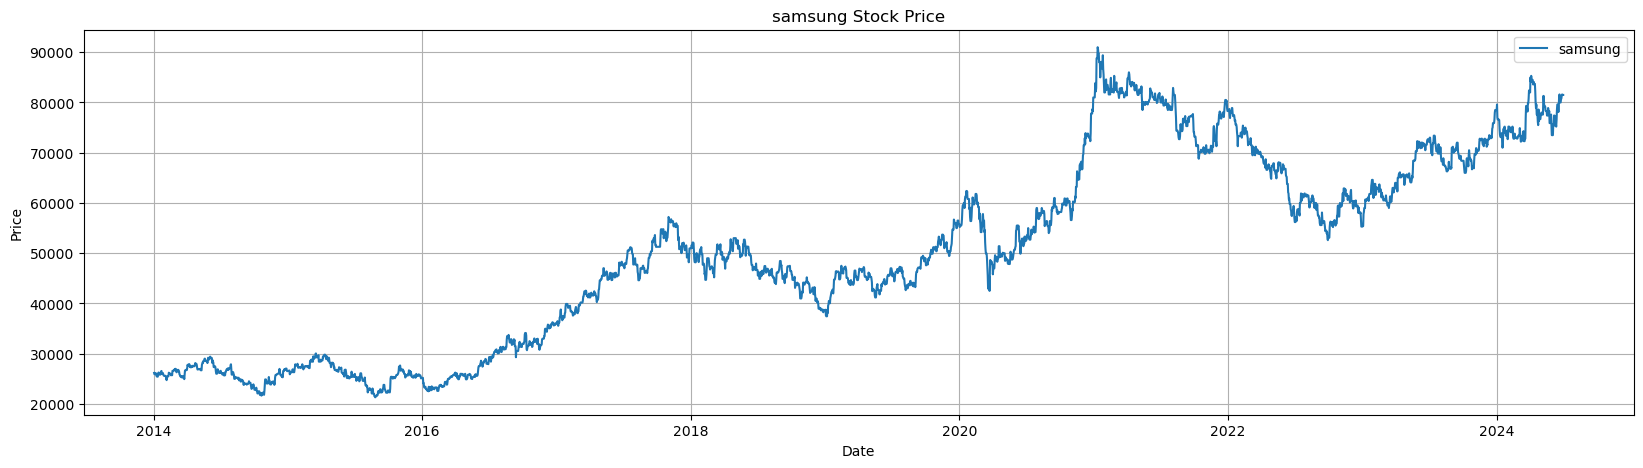

In [5]:
# 애플 주식 그래프 그리기
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df[f'{compare1}_Close'], label=f'{compare1}')

plt.title(f'{compare1} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

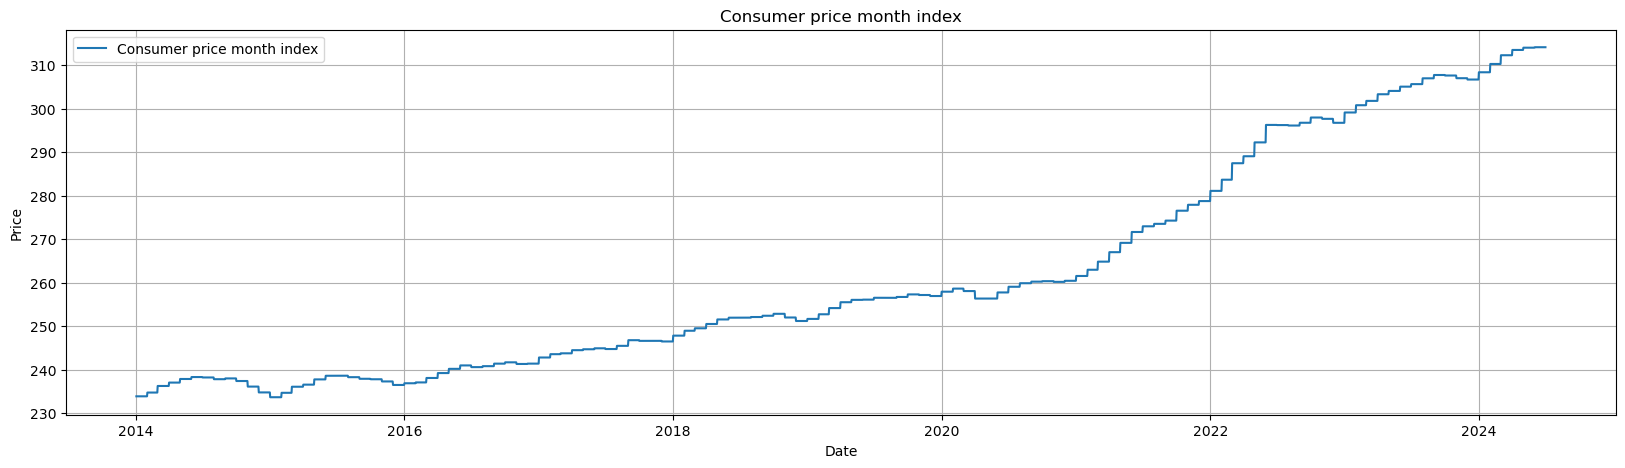

In [6]:
# CPI 전년대비
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df[f'{compare2data}'], label=f'{compare2}')

plt.title(f'{compare2}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

In [7]:
# 0과 1 사이의 값으로 정규화
def normalize(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [8]:
compare1_normalize = normalize(df, f'{compare1}_Close')
compare2_normalize = normalize(df, f'{compare2data}')

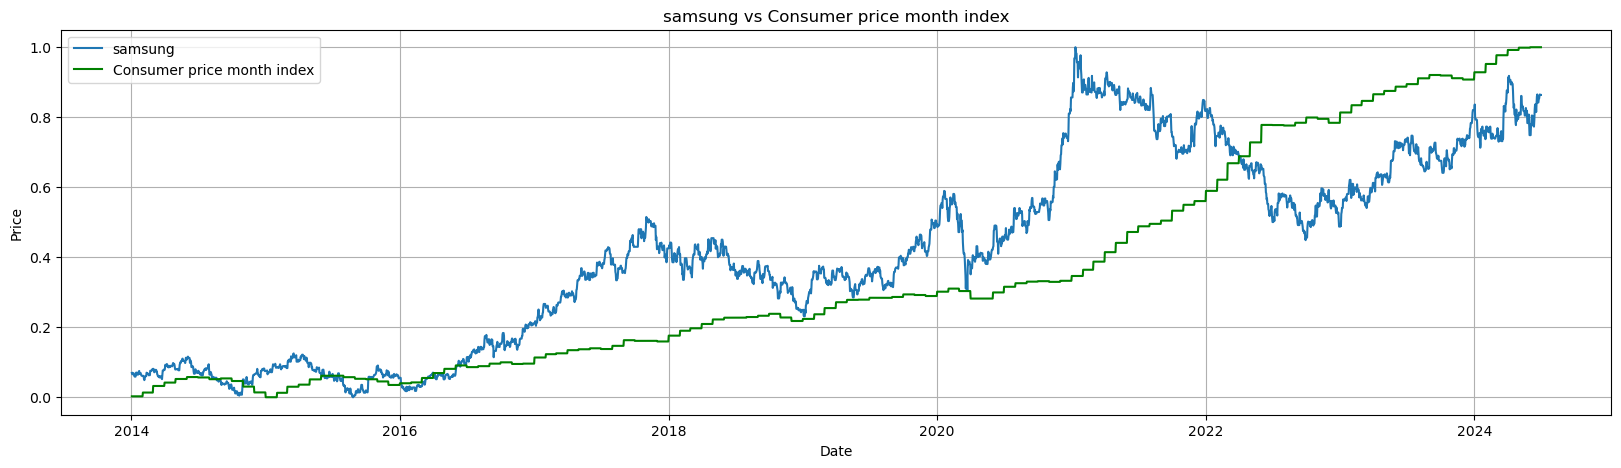

In [9]:
# 정규화 적용 애플주식과 소비자물가지수 전년대비 그래프
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], compare1_normalize, label=f'{compare1}')
plt.plot(df['Date'], compare2_normalize, label=f'{compare2}', color='green')

plt.title(f'{compare1} vs {compare2}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

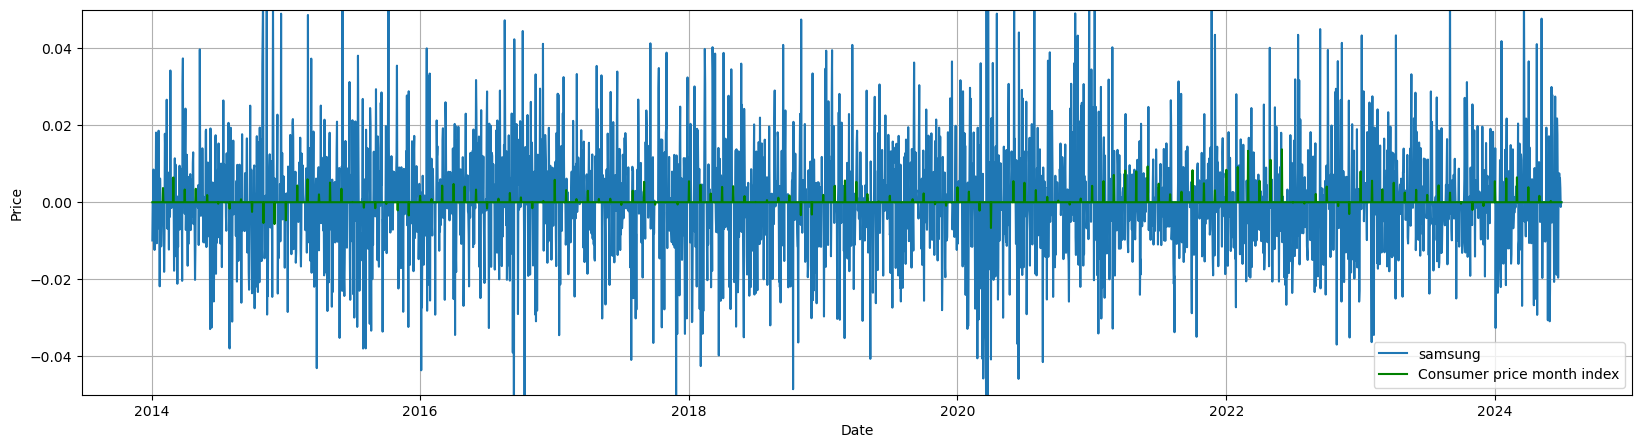

In [10]:
# 변동율 차이 비교
compare1_daily_change = df[f'{compare1}_Close'].pct_change()
compare2_daily_change = df[f'{compare2data}'].pct_change()

#그래프화
plt.figure(figsize=(20,5))
plt.plot(df['Date'], compare1_daily_change, label=f'{compare1}')
plt.plot(df['Date'], compare2_daily_change, label=f'{compare2}', color='green')
plt.ylim(-0.05, 0.05)

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


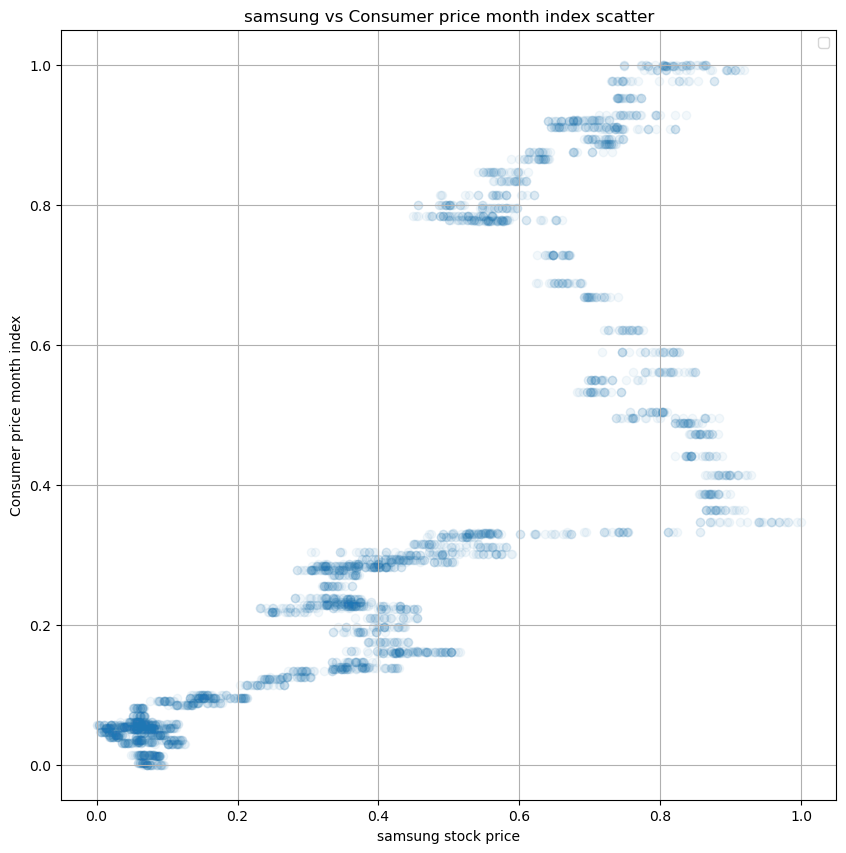

In [11]:
# 정규화 데이터로 산점도 그래프
plt.figure(figsize=(10,10))
plt.scatter(compare1_normalize, compare2_normalize, alpha=0.05)

plt.title(f'{compare1} vs {compare2} scatter')
plt.xlabel(f'{compare1} stock price')
plt.ylabel(f'{compare2}')
plt.legend()
plt.grid(True)

plt.show()

In [12]:
# Calculate the correlation
correlation = df[f'{compare2data}'].corr(df[f'{compare1}_Close'])
print(f"Correlation between {compare2} and {compare1} Stock Price: {correlation:.2f}")

Correlation between Consumer price month index and samsung Stock Price: 0.80


C:\Users\4호실-8\AppData\Local\Temp\ipykernel_7384\616472008.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['US_GDP_KRW'] = round(df[f'{compare2data}'] * df['dollar_to_won_Close'])
c:\Anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1780  , p=0.2778  , df_denom=3829, df_num=1
ssr based chi2 test:   chi2=1.1789  , p=0.2776  , df=1
likelihood ratio test: chi2=1.1787  , p=0.2776  , df=1
parameter F test:         F=1.1780  , p=0.2778  , df_denom=3829, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5137  , p=0.0811  , df_denom=3826, df_num=2
ssr based chi2 test:   chi2=5.0340  , p=0.0807  , df=2
likelihood ratio test: chi2=5.0307  , p=0.0808  , df=2
parameter F test:         F=2.5137  , p=0.0811  , df_denom=3826, df_num=2
                                   OLS Regression Results                                  
Dep. Variable:     미국 소비자물가지수(CPI) 전월대비_Normalized   R-squared:                       0.641
Model:                                         OLS   Adj. R-squared:                  0.641
Method:                              Least Squares   F-statistic:                     6852.
Date:                   

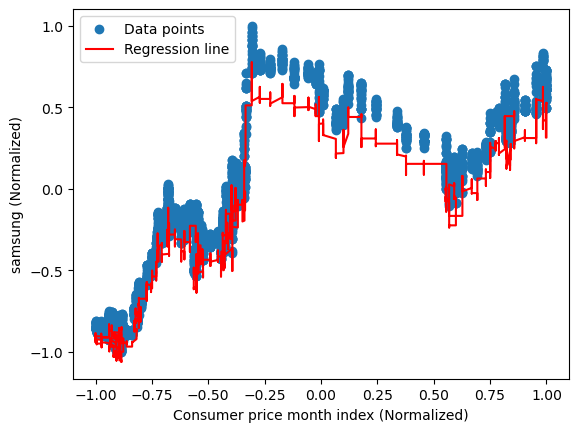

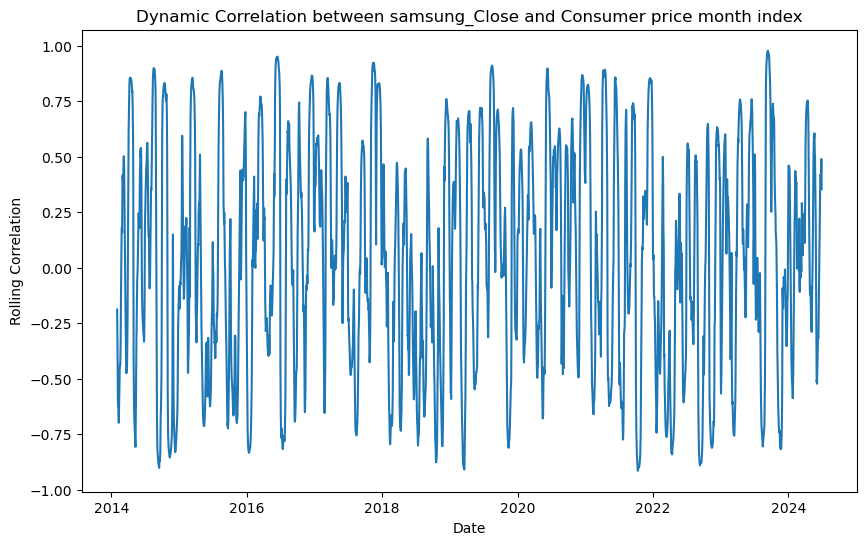

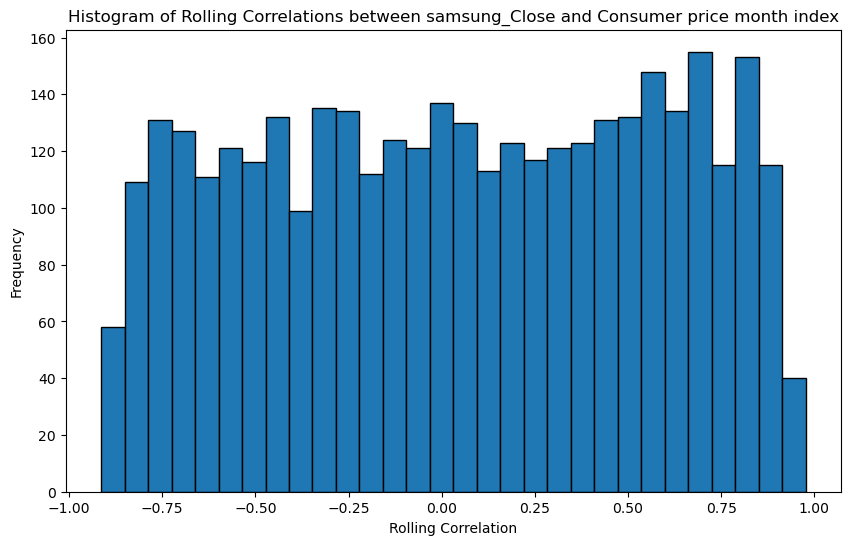


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1780  , p=0.2778  , df_denom=3829, df_num=1
ssr based chi2 test:   chi2=1.1789  , p=0.2776  , df=1
likelihood ratio test: chi2=1.1787  , p=0.2776  , df=1
parameter F test:         F=1.1780  , p=0.2778  , df_denom=3829, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5137  , p=0.0811  , df_denom=3826, df_num=2
ssr based chi2 test:   chi2=5.0340  , p=0.0807  , df=2
likelihood ratio test: chi2=5.0307  , p=0.0808  , df=2
parameter F test:         F=2.5137  , p=0.0811  , df_denom=3826, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9763  , p=0.1153  , df_denom=3823, df_num=3
ssr based chi2 test:   chi2=5.9398  , p=0.1146  , df=3
likelihood ratio test: chi2=5.9352  , p=0.1148  , df=3
parameter F test:         F=1.9763  , p=0.1153  , df_denom=3823, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6961  , p=0.

c:\Anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [13]:
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests

# 필요한 데이터만 가져오기
df = stock_data[['Date', f'{compare1}_Close', f'{compare2data}', 'dollar_to_won_Close']]
df['US_GDP_KRW'] = round(df[f'{compare2data}'] * df['dollar_to_won_Close'])
df.head(3)

def normalize_data(series):
    # MinMaxScaler를 사용하여 데이터를 -1과 1 사이로 정규화
    scaler = MinMaxScaler(feature_range=(-1, 1))
    return scaler.fit_transform(series.values.reshape(-1, 1))

def Regression(compare1, compare2data, compare2):
    # 데이터 정규화
    stock_data[f'{compare1}_Close_Normalized'] = normalize_data(stock_data[f'{compare1}_Close'])
    stock_data[f'{compare2data}_Normalized'] = normalize_data(stock_data[f'{compare2data}'])

    # 선형 회귀 분석
    X = stock_data[f'{compare1}_Close_Normalized']
    y = stock_data[f'{compare2data}_Normalized']
    X = sm.add_constant(X)  # 상수항 추가
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # 회귀 분석 결과 출력
    print(model.summary())

    # 산점도 및 회귀선 그래프
    plt.scatter(stock_data[f'{compare2data}_Normalized'], stock_data[f'{compare1}_Close_Normalized'], label='Data points')
    plt.plot(stock_data[f'{compare2data}_Normalized'], predictions, color='red', label='Regression line')
    plt.xlabel(f'{compare2} (Normalized)')
    plt.ylabel(f'{compare1} (Normalized)')
    plt.legend()
    plt.show()

    
def rolling_correlation_and_granger_test(compare1, compare2data, compare2, window_size=30, max_lag=5, stock_data=stock_data):
    col1 = f'{compare1}_Close'
    col2 = compare2data

    # 날짜 인덱스 설정
    if not pd.api.types.is_datetime64_any_dtype(stock_data.index):
        stock_data.index = pd.to_datetime(stock_data['Date'])
        stock_data = stock_data.drop(columns=['Date'])

    # 롤링 상관관계 계산
    rolling_corr = stock_data[col1].rolling(window=window_size).corr(stock_data[col2]).dropna()

    # 무한 값과 NaN 값 제거
    rolling_corr = rolling_corr[~rolling_corr.isin([np.inf, -np.inf])].dropna()

    # 롤링 상관관계 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_corr)
    plt.xlabel('Date')
    plt.ylabel('Rolling Correlation')
    plt.title(f'Dynamic Correlation between {col1} and {compare2}')
    plt.show()

    # 롤링 상관관계의 히스토그램 그리기
    plt.figure(figsize=(10, 6))
    plt.hist(rolling_corr, bins=30, edgecolor='k')
    plt.xlabel('Rolling Correlation')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Rolling Correlations between {col1} and {compare2}')
    plt.show()

    # 그랜저 인과성 테스트
    granger_test_result = grangercausalitytests(stock_data[[col1, col2]], max_lag, verbose=True)

    return rolling_corr, granger_test_result

def Granger(compare1, compare2data, compare2, stock_data=stock_data):
    if f'{compare1}_Close' not in stock_data.columns or compare2data not in stock_data.columns:
        raise KeyError(f"Columns {compare1}_Close and/or {compare2data} not found in the provided DataFrame")
    
    max_lag = 2
    result1 = grangercausalitytests(stock_data[[f'{compare1}_Close', compare2data]], max_lag, verbose=True)
    result2 = coint_johansen(stock_data[[f'{compare1}_Close', compare2data]], det_order=-1, k_ar_diff=1)
    
    return result1, result2.lr1, result2.cvt

def everything(compare1, compare2data, compare2):
    Granger(compare1, compare2data, compare2)
    Regression(compare1, compare2data, compare2)
    rolling_correlation_and_granger_test(compare1, compare2data, compare2)
everything(compare1, compare2data, compare2)